### Load the Libraries

In [ ]:
!pip install keras-tcn

In [ ]:
import numpy as np
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tcn import compiled_tcn

### Read the data

In [ ]:
import random
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/My Drive/resized128N")
p=os.listdir('.')
print(len(p))

5775


In [ ]:
os.getcwd()
print(len(os.listdir('.')))

5775


In [ ]:
def load_data():

  train_img=[]
  train_labels=[]

  test_img=[]
  test_labels=[]
  
  file_list=os.listdir('.')
  # file_list=file_list[:300]
  random.shuffle(file_list)
  
  first_few = file_list[:int(0.9*len(file_list))]
  last_few = file_list[int(0.9*len(file_list))-1:]

  for f in first_few:
    label = f.split('.')[0]
    img=Image.open(f)
    np_array = np.asarray(img)
    # print("image shape:",np_array.shape)
    train_img.append(np_array)

    dances=['ballet','bharatnatyam','break','flamenco','square','waltz']
    item = dances.index(label)
    train_labels.append(item) 


  for f in last_few:
    label = f.split('.')[0]
    img=Image.open(f)
    np_array = np.asarray(img)
    # print("image shape:",np_array.shape)
    test_img.append(np_array)


    # print('label:',label)
    dances=['ballet','bharatnatyam','break','flamenco','square','waltz']
    item = dances.index(label)
    test_labels.append(item)

  train_img=np.asarray(train_img)
  train_labels=np.asarray(train_labels)
  test_img=np.asarray(test_img)
  test_labels=np.asarray(test_labels)
  print(train_labels)
  print(test_labels)

  return ((train_img,train_labels),(test_img,test_labels))

In [ ]:
test_i=[]
test_img_name=[]

def load_test():
  global test_i
  global test_img_name
  test_l=[]
  
  file_list=os.listdir('/content/drive/My Drive/testvideos/test')
  os.chdir('/content/drive/My Drive/testvideos/test')
  print('len(file_list:',len(file_list))
  for f in file_list:
    test_img_name.append(f)
    label = f.split('.')[0]
    img=Image.open(f)
    newsize = (128,128)
    img = img.resize(newsize)
    np_array = np.asarray(img)
    # print("image shape:",np_array.shape)
    test_i.append(np_array)

    dances=['ballet','bharatnatyam','break','flamenco','square','waltz']
    item = dances.index(label)
    test_l.append(item)

  
  test_i=np.asarray(test_i)
  test_l=np.asarray(test_l)
  print('test_i.shape:',test_i.shape)
  print('test_l.shape:',test_l.shape)

  os.chdir('/content/drive/My Drive/resized128N')
  return (test_i,test_l)

In [ ]:
def data_generator():
    # input image dimensions
    img_rows, img_cols = 128,128
    (x_train, y_train), (x_test, y_test) = load_data()
    (x_test, y_test)=load_test()
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    x_train = x_train.reshape(-1, img_rows * img_cols, 3)
    x_test = x_test.reshape(-1, img_rows * img_cols, 3)

    num_classes = 6
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    y_train = np.expand_dims(y_train, axis=2)
    y_test = np.expand_dims(y_test, axis=2)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    return (x_train, y_train), (x_test, y_test)

### Load the data and Preprocess

In [ ]:
(x_train, y_train), (x_test, y_test) = data_generator()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

[2 3 4 ... 4 4 1]
[1 4 1 4 4 4 2 3 2 1 2 2 3 0 0 0 3 1 4 0 3 4 5 5 4 4 0 5 5 5 1 4 3 2 5 5 2
 0 4 5 2 4 3 4 0 4 2 0 4 0 0 2 4 4 5 4 0 5 1 1 3 3 2 0 0 1 1 2 2 5 5 2 0 3
 5 3 4 4 5 5 1 1 4 3 1 1 4 2 5 5 0 1 0 0 2 5 5 4 4 3 2 2 2 2 4 0 0 1 3 3 1
 0 4 5 2 1 2 2 3 2 5 0 1 3 5 4 4 3 4 4 2 1 4 5 2 0 4 3 0 4 1 5 1 5 0 5 2 1
 5 0 5 4 1 0 5 5 1 5 0 0 5 1 1 3 2 4 4 1 2 3 4 4 2 4 4 3 4 5 3 1 1 3 3 3 5
 4 2 3 4 2 4 0 0 0 1 0 4 1 1 5 5 2 0 4 0 2 5 3 1 1 4 2 0 5 2 5 4 4 3 1 5 5
 5 1 1 0 3 3 5 2 3 2 0 4 3 0 2 2 3 4 5 1 1 5 2 0 2 3 4 1 5 0 4 4 5 4 1 1 4
 4 2 3 2 4 2 1 0 5 1 1 4 1 4 2 5 1 3 1 1 4 1 5 4 2 2 4 4 2 2 1 5 5 5 5 2 0
 4 4 3 5 4 4 1 4 1 5 4 5 5 1 5 4 4 1 5 4 5 3 0 5 3 1 2 4 4 4 3 4 4 3 0 1 2
 4 1 2 3 1 3 0 1 1 0 5 0 5 4 0 4 1 3 4 4 2 1 0 3 5 5 1 4 3 4 0 1 4 4 4 3 5
 1 3 5 3 2 1 2 1 3 5 0 1 0 1 2 1 5 4 0 3 1 3 3 4 4 1 1 2 5 4 5 0 5 1 2 5 1
 0 4 3 3 5 1 0 0 4 1 5 1 3 1 3 3 0 4 1 4 4 1 5 0 3 1 3 3 5 0 1 5 0 0 0 0 5
 0 4 4 2 1 5 3 4 3 1 1 0 1 5 0 5 3 1 0 3 1 0 3 5 2 4 0 0 2 0 2 3 1 2 2 1 4
 3 0 1 

In [ ]:
A=x_test[0]
print(A.shape)
B = np.reshape(A, (-1, 2))
print(B.shape)

temp=x_test[0].s
cv2_imshow(temp)

(16384, 3)
(24576, 2)


AttributeError: ignored

In [ ]:
(x_train, y_train), (x_test, y_test) = data_generator()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

[1 3 2 2 1 0 1 3 2 2 1 3 3 3 0 0 3 0 1 1 2 1 1 3 0 3 2 1 3 3 1 0 0 3 3 1 2
 1 0 2 3 1 1 1 2 3 2 1 2 1 1 0 1 3 3 0 1 1 2 2 2 2 3 1 1 1 2 0 2 1 2 3 2 3
 2 0 2 3 1 2 0 0 0 1 1 3 1 3 0 2 2 3 3 1 2 0 3 2 1 2 0 2 0 3 0 3 2 2 3 3 0
 1 2 3 2 3 0 0 2 3 1 2 0 0 1 3 0 2 3 1 0 3 0 1 0 2 1 2 0 0 3 0 3 3 3 3 3 0
 0 2 1 1 0 1 2 1 1 0 1 1 1 0 3 1 1 3 1 0 0 1 1 2 1 2 2 3 3 1 1 1 1 0 2 1 1
 3 0 1 0 1 1 2 3 1 1 3 3 3 0 3 3 3 3 3 2 2 1 3 3 1 1 1 2 1 1 2 0 3 3 1 2 3
 1 1 2 0 0 0 3 1 2 2 3 1 0 3 3 0 3 2 2 2 0 3 3 1 0 3 1 1 3 1 1 1 1 1 0 1 1
 3 0 0 3 0 3 3 3 1 1 0 3 2 3 0 1 3 1 2 3 0 2 2 1 2 2 1 0 1 1 2 1 2 1 2 0 0
 0 1 2 3 0 3 3 1 3 1 0 3 3 0 1 3 2 0 3 1 3 0 3 3 0 1 0 2 1 0 2 0 3 3 0 2 2
 3 0 0 0 1 1 2 0 0 0 0 2 3 1 0 2 3 2 2 0 1 2 2 1 1 1 1 1 1]
(3249, 128, 128, 3) (3249,) (362, 128, 128, 3) (362,)
(3249, 16384, 3) (3249, 4) (362, 16384, 3) (362, 4)
(3249, 16384, 3) (3249, 4, 1) (362, 16384, 3) (362, 4, 1)
(3249, 16384, 3) (3249, 4, 1) (362, 16384, 3) (362, 4, 1)


### Design the TCN Model

In [ ]:
model = compiled_tcn(return_sequences=False,
                         num_feat=3,
                         num_classes=6,
                         nb_filters=20,
                         kernel_size=6,
                         dilations=[2 ** i for i in range(9)],
                         nb_stacks=1,
                         max_len=x_train[0:1].shape[1],
                         use_skip_connections=True)

x.shape= (None, 20)
model.x = (None, 16384, 3)
model.y = (None, 6)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
print(f'x_train.shape = {x_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape}')
print(f'y_test.shape = {y_test.shape}')

x_train.shape = (5197, 16384, 3)
y_train.shape = (5197, 6, 1)
x_test.shape = (192, 16384, 3)
y_test.shape = (192, 6, 1)


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16384, 3)]        0         
                                                                 
 tcn (TCN)                   (None, 20)                41600     
                                                                 
 dense_1 (Dense)             (None, 6)                 126       
                                                                 
 activation_1 (Activation)   (None, 6)                 0         
                                                                 
Total params: 41,726
Trainable params: 41,726
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train = y_train.squeeze().argmax(axis=1)
y_test = y_test.squeeze().argmax(axis=1)

In [ ]:
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test), workers=4, use_multiprocessing=True)

Epoch 1/10
163/163 [==============================] - 33s 183ms/step - loss: 1.5034 - accuracy: 0.4974 - val_loss: 0.8587 - val_accuracy: 0.6511
Epoch 2/10
163/163 [==============================] - 29s 180ms/step - loss: 0.7944 - accuracy: 0.7079 - val_loss: 0.5717 - val_accuracy: 0.7824
Epoch 3/10
163/163 [==============================] - 29s 179ms/step - loss: 0.5583 - accuracy: 0.7960 - val_loss: 0.3552 - val_accuracy: 0.8808
Epoch 4/10
163/163 [==============================] - 29s 179ms/step - loss: 0.4429 - accuracy: 0.8434 - val_loss: 0.2908 - val_accuracy: 0.9067
Epoch 5/10
163/163 [==============================] - 29s 179ms/step - loss: 0.3364 - accuracy: 0.8815 - val_loss: 0.2050 - val_accuracy: 0.9257
Epoch 6/10
163/163 [==============================] - 29s 179ms/step - loss: 0.2817 - accuracy: 0.9042 - val_loss: 0.2018 - val_accuracy: 0.9240
Epoch 7/10
163/163 [==============================] - 29s 179ms/step - loss: 0.2499 - accuracy: 0.9151 - val_loss: 0.2199 - val_ac

In [ ]:
model.save_weights(filepath='/content/drive/My Drive/temporal_weights_c.pth')
# history.model.save(filepath='/content/drive/My Drive/temporal_weights')
# model.lo
model.save_weights

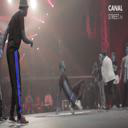

In [ ]:
k=Image.open('break.1.jpg')
o=np.asarray(k)
cv2_imshow(o)

6/6 [==============================] - 0s 57ms/step - loss: 0.1518 - accuracy: 0.9844
Accuracy : 98.44 %
Loss : 15.18 %
192


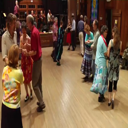

predicted_dance: waltz
actual dance: square


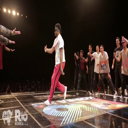

predicted_dance: break
actual dance: ballet


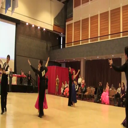

predicted_dance: square
actual dance: break


In [ ]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

result = model.evaluate(x_test, y_test)
print(f"Accuracy : {result[1] * 100:.2f} %")
print(f"Loss : {result[0] * 100:.2f} %")
print(len(y_test))
pred_y=model.predict(x_test)
answer = np.where(pred_y > 0.9, 1, pred_y)
answer = np.where(answer < 0.2, 0, answer)
# print(answer)
# print(test_i)

dances=['ballet','bharatnatyam','break','flamenco','square','waltz']

for i in range(0,len(y_test)):


  image_index = i

  temp=test_i[image_index][:, :, [2, 1, 0]]
  max_value = max(answer[image_index])
  predicted_index=answer[image_index].tolist().index(max_value)
  predicted_dance = dances[predicted_index]
  actual_dance = dances[y_test[image_index]]

  # print('name:',x_test[image_index])
  if actual_dance!=predicted_dance:
  # if test_img_name[image_index] == 'ballet.295.jpg':

  # print('pred_y:',answer)
    cv2_imshow(temp)
    print('predicted_dance:',predicted_dance)
    print('actual dance:',actual_dance)

pil_img = Image.fromarray(temp)
# print(type(x_test[0]))
# plt.imshow(temp)

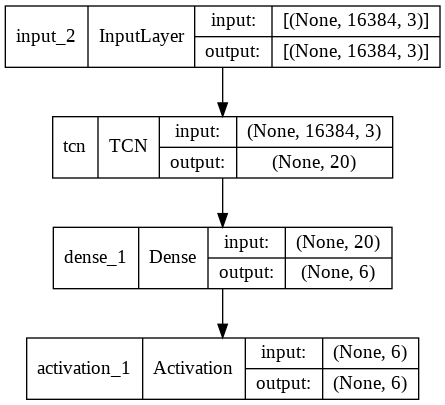

In [ ]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

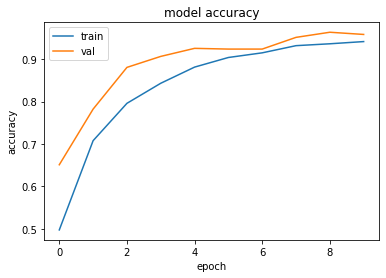

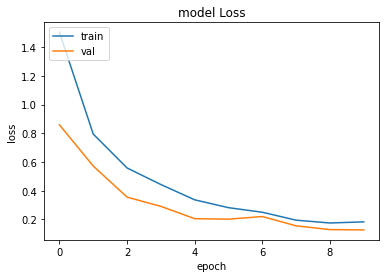

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Cohens kappa: 0.981250
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      1.00      1.00        32
           2       0.97      0.97      0.97        32
           3       1.00      1.00      1.00        32
           4       0.97      0.97      0.97        32
           5       0.97      1.00      0.98        32

    accuracy                           0.98       192
   macro avg       0.98      0.98      0.98       192
weighted avg       0.98      0.98      0.98       192



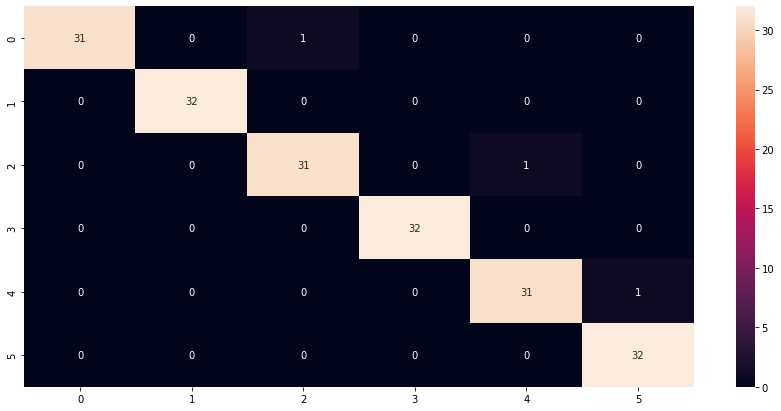

In [ ]:
# predict probabilities for test set
yhat_probs = np.argmax(model.predict(x_test, verbose=0), axis=1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_probs)
print('Cohens kappa: %f' % kappa)
# ROC AUC
# auc = roc_auc_score(y_test, yhat_probs, multi_class = 'ovo')
# print('ROC AUC: %f' % auc)

print(classification_report(y_test, yhat_probs))
# confusion matrix
matrix = confusion_matrix(y_test, yhat_probs)
plt.figure(figsize = (15,7) )
sns.heatmap(matrix, annot=True)
plt.show()